UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [265]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
import os

import getpass
from pathlib import Path, PureWindowsPath # please check this medium article!! https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

if getpass.getuser() == 'Konrad':
    project_dir = Path(PureWindowsPath('D:\\DeepLearningProject'))
elif getpass.getuser() == 'fruechtnicht':
    project_dir = Path('/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir')
else:
    raise ValueError('Check you own user name and add proper elif statement !!!')
# if you have a windows computer please specify your project path as Konrad, if not as fruechtnicht
os.chdir(project_dir)

**Constants**

In [267]:
DATA_DIR = "UTKFace"
TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 198
ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())

ID_GENDER_MAP, GENDER_ID_MAP, ID_RACE_MAP, RACE_ID_MAP

({0: 'male', 1: 'female'},
 {'male': 0, 'female': 1},
 {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'},
 {'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'others': 4})

In [268]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_GENDER_MAP[int(gender)], ID_RACE_MAP[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [269]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))

In [270]:
attributes = list(map(parse_filepath, files))

UTKFace\39_1_20170116174525125.jpg.chip.jpg


In [271]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.describe()

,age
count,18188.000000
mean,30.368925
std,15.188275
min,1.000000
25%,22.000000
50%,30.000000
75%,40.000000
max,60.000000


# Exploratory analysis

In [272]:
df.describe()

,age
count,18188.000000
mean,30.368925
std,15.188275
min,1.000000
25%,22.000000
50%,30.000000
75%,40.000000
max,60.000000


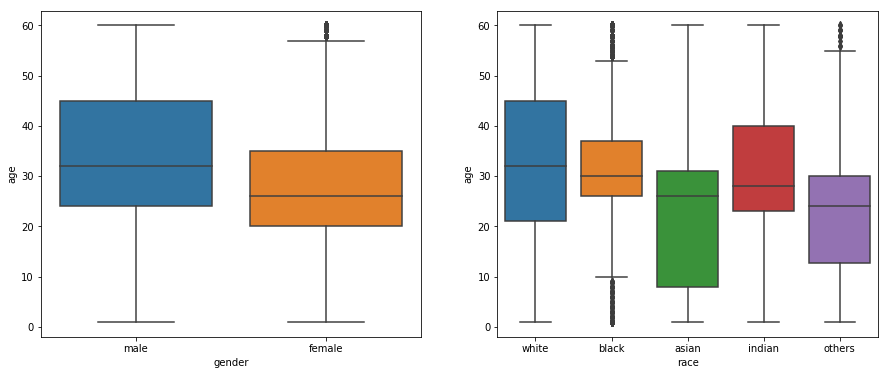

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
_ = sns.boxplot(data=df, x='gender', y='age', ax=ax1)
_ = sns.boxplot(data=df, x='race', y='age', ax=ax2)

From the plot we can see that most of people are within 10 and 55 years of age. Most probably, we'll discard the dataset for rest of the ages.

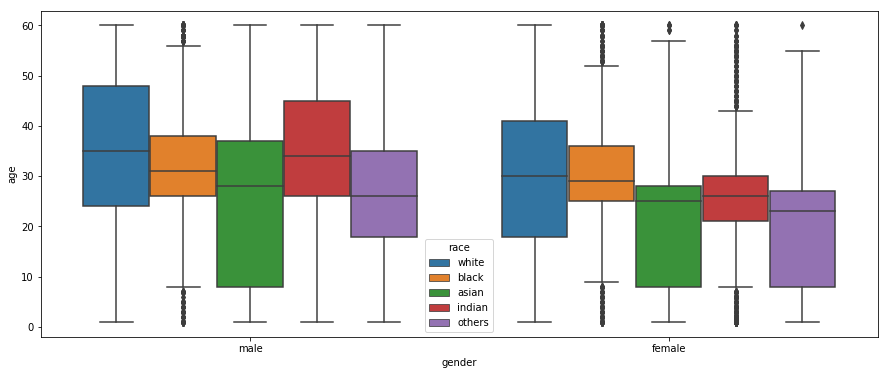

In [203]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='gender', y='age', hue='race')

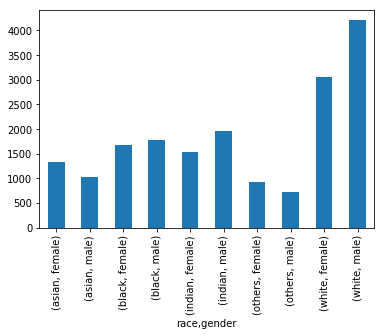

In [273]:
df.groupby(by=['race', 'gender'])['age'].count().plot(kind='bar')

It turns out that there are many images of *white male* and *while female*. images from *others* category are very less in number compared to rest of the categories especially *white* category.
Let's analyze our data from *age* perspective.

In [244]:
df_filtered = df[df['age'] < 60]

In [245]:
from sklearn.utils import shuffle
df_filtered = shuffle(df_filtered)
df_filtered = df_filtered.sort_values(by=['race','age'])
df_filtered = df_filtered.reset_index()
df_filtered['class'] = 0

In [274]:

df_filtered.head()
len(df)

18188

In [142]:
temp = df_filtered['age'][0]
df_filtered['age'][0] == temp

True

In [227]:
df.groupby(by=['race', 'gender']).head()

,age,gender,race,file
0,10.0,male,white,UTKFace\10_0_0_20161220222308131.jpg.chip.jpg
1,10.0,male,white,UTKFace\10_0_0_20170103200329407.jpg.chip.jpg
2,10.0,male,white,UTKFace\10_0_0_20170103200522151.jpg.chip.jpg
3,10.0,male,white,UTKFace\10_0_0_20170103233459275.jpg.chip.jpg
4,10.0,male,white,UTKFace\10_0_0_20170104013211746.jpg.chip.jpg
67,10.0,male,black,UTKFace\10_0_1_20170104010841239.jpg.chip.jpg
68,10.0,male,black,UTKFace\10_0_1_20170110220507258.jpg.chip.jpg
69,10.0,male,black,UTKFace\10_0_1_20170110220523360.jpg.chip.jpg
70,10.0,male,black,UTKFace\10_0_1_20170110223455893.jpg.chip.jpg
71,10.0,male,black,UTKFace\10_0_1_20170110223848885.jpg.chip.jpg


In [143]:
i=0
temp = df_filtered['age'][0]
for index in range(len(df_filtered)):
    if df_filtered['age'][index] == temp:
        i+=1
        df_filtered['class'][index] = i
    else:
        i=0
        temp = df_filtered['age'][index]
df_filtered.head()

C:\Users\Konrad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,level_0,index,age,gender,race,file,class
0,2694,7339,26.0,female,asian,UTKFace\26_1_2_20170116163019946.jpg.chip.jpg,1
1,3088,15827,40.0,female,asian,UTKFace\40_1_2_20170116161916676.jpg.chip.jpg,0
2,1106,20205,5.0,male,asian,UTKFace\5_0_2_20161219222440743.jpg.chip.jpg,0
3,2458,20293,5.0,female,asian,UTKFace\5_1_2_20161219151834275.jpg.chip.jpg,1
4,1284,1937,1.0,male,asian,UTKFace\1_0_2_20161219210754437.jpg.chip.jpg,0


In [137]:
df_filtered_limited = df[df['age'] < 60]
df_filtered['class'][1000]

1001

In [259]:
df['race'].value_counts()

white     7593
black     3793
indian    3490
asian     2435
others    1654
Name: race, dtype: int64

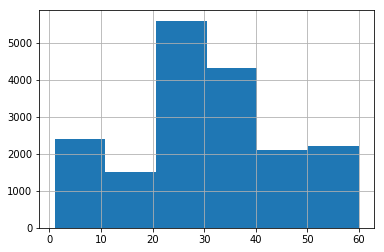

In [277]:
df['age'].hist(bins=6)

In [276]:
#df['age'].hist()
pd.crosstab(df['age'], df['race'])

race,asian,black,indian,others,white
age,,,,,
1.0,145,33,141,117,129
2.0,88,18,75,94,94
3.0,74,17,32,28,82
4.0,70,18,41,37,107
5.0,58,15,30,18,75
6.0,18,11,28,20,54
7.0,19,18,12,19,71
8.0,22,12,33,24,95
9.0,14,12,4,5,131


In [263]:
pd.crosstab(df['age'], df['gender'])

gender,female,male
age,,
1.0,330,235
2.0,194,175
3.0,149,84
4.0,165,108
5.0,118,78
6.0,102,29
7.0,80,59
8.0,119,67
9.0,30,136


In [230]:
len(df['age'])

19697

race,asian,black,indian,others,white
age,,,,,
1.0,430,33,234,139,287
2.0,201,18,75,94,94
3.0,97,17,32,28,115
4.0,70,18,41,37,107
5.0,58,15,30,18,75
6.0,18,11,28,20,54
7.0,19,18,12,19,71
8.0,22,12,33,24,172
9.0,14,12,4,5,131


In [44]:
#df['age'].hist()
pd.crosstab(df['age'], df['gender'])

gender,female,male
age,,
1.0,478,645
2.0,254,228
3.0,192,97
4.0,165,108
5.0,118,78
6.0,102,29
7.0,80,59
8.0,196,67
9.0,30,136


In [45]:
df['race'].value_counts()

white     10078
black      4526
indian     3975
asian      3434
others     1692
Name: race, dtype: int64

# Data prep

In [ ]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * TRAIN_TEST_SPLIT)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.7)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

df['gender_id'] = df['gender'].map(lambda gender: GENDER_ID_MAP[gender])
df['race_id'] = df['race'].map(lambda race: RACE_ID_MAP[race])

max_age = df['age'].max()
len(train_idx), len(valid_idx), len(test_idx), max_age

In [ ]:
from keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, ages, races, genders = [], [], [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, age, race, gender = r['file'], r['age'], r['race_id'], r['gender_id']
            im = Image.open(file)
            im = im.resize((IM_WIDTH, IM_HEIGHT))
            im = np.array(im) / 255.0
            images.append(im)
            ages.append(age / max_age)
            races.append(to_categorical(race, len(RACE_ID_MAP)))
            genders.append(to_categorical(gender, 2))
            if len(images) >= batch_size:
                yield np.array(images), [np.array(ages), np.array(races), np.array(genders)]
                images, ages, races, genders = [], [], [], []
        if not for_training:
            break

# Model training

In [ ]:
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from keras.optimizers import SGD
from keras.models import Model

def conv_block(inp, filters=32, bn=True, pool=True):
    _ = Conv2D(filters=filters, kernel_size=3, activation='relu')(inp)
    if bn:
        _ = BatchNormalization()(_)
    if pool:
        _ = MaxPool2D()(_)
    return _

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
_ = conv_block(input_layer, filters=32, bn=False, pool=False)
_ = conv_block(_, filters=32*2)
_ = conv_block(_, filters=32*3)
_ = conv_block(_, filters=32*4)
_ = conv_block(_, filters=32*5)
_ = conv_block(_, filters=32*6)
bottleneck = GlobalMaxPool2D()(_)

# for age calculation
_ = Dense(units=128, activation='relu')(bottleneck)
age_output = Dense(units=1, activation='sigmoid', name='age_output')(_)

# for race prediction
_ = Dense(units=128, activation='relu')(bottleneck)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(_)

# for gender prediction
_ = Dense(units=128, activation='relu')(bottleneck)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(_)

model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])
model.compile(optimizer='rmsprop', 
              loss={'age_output': 'mse', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'mae', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint

batch_size = 64
valid_batch_size = 64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]

history = model.fit_generator(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=10,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)
                    


In [ ]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].plot(history.history['race_output_acc'], label='Race Train accuracy')
    axes[0].plot(history.history['val_race_output_acc'], label='Race Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['gender_output_acc'], label='Gender Train accuracy')
    axes[1].plot(history.history['val_gender_output_acc'], label='Gener Val accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['age_output_mean_absolute_error'], label='Age Train MAE')
    axes[2].plot(history.history['val_age_output_mean_absolute_error'], label='Age Val MAE')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

    axes[3].plot(history.history['loss'], label='Training loss')
    axes[3].plot(history.history['val_loss'], label='Validation loss')
    axes[3].set_xlabel('Epochs')
    axes[3].legend()

plot_train_history(history)

In [ ]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate_generator(test_gen, steps=len(test_idx)//128)))

In [ ]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, (age_true, race_true, gender_true)= next(test_gen)
age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)

In [ ]:
race_true, gender_true = race_true.argmax(axis=-1), gender_true.argmax(axis=-1)
race_pred, gender_pred = race_pred.argmax(axis=-1), gender_pred.argmax(axis=-1)
age_true = age_true * max_age
age_pred = age_pred * max_age

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for race")
print(classification_report(race_true, race_pred))

print("\nClassification report for gender")
print(classification_report(gender_true, gender_pred))


In [ ]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('a:{}, g:{}, r:{}'.format(int(age_pred[img_idx]), ID_GENDER_MAP[gender_pred[img_idx]], ID_RACE_MAP[race_pred[img_idx]]))
    ax.set_xlabel('a:{}, g:{}, r:{}'.format(int(age_true[img_idx]), ID_GENDER_MAP[gender_true[img_idx]], ID_RACE_MAP[race_true[img_idx]]))
    ax.set_xticks([])
    ax.set_yticks([])
    